<a href="https://colab.research.google.com/github/mikehviz/R_Data_Analysis_HW-s/blob/main/5_PCA_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Components Analysis
##Reading

* [The Decathlon Example](http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/112-pca-principal-component-analysis-essentials/)

* [Application of Principle Component Analysis Using USArrests Data](https://rpubs.com/Hgoswami/377338) 

* [Principal Component Analysis in R: Step-by-Step Example](https://www.statology.org/principal-components-analysis-in-r/)



In [ ]:
# takes about 4-8 min. to load
library(tidyverse)
install.packages("factoextra")
library("factoextra")
library(cowplot) # to put two ggplots side-by-side
library("corrplot") # for correlation plots

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘xtable’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstat

##Rationales

Consider the simulated data below

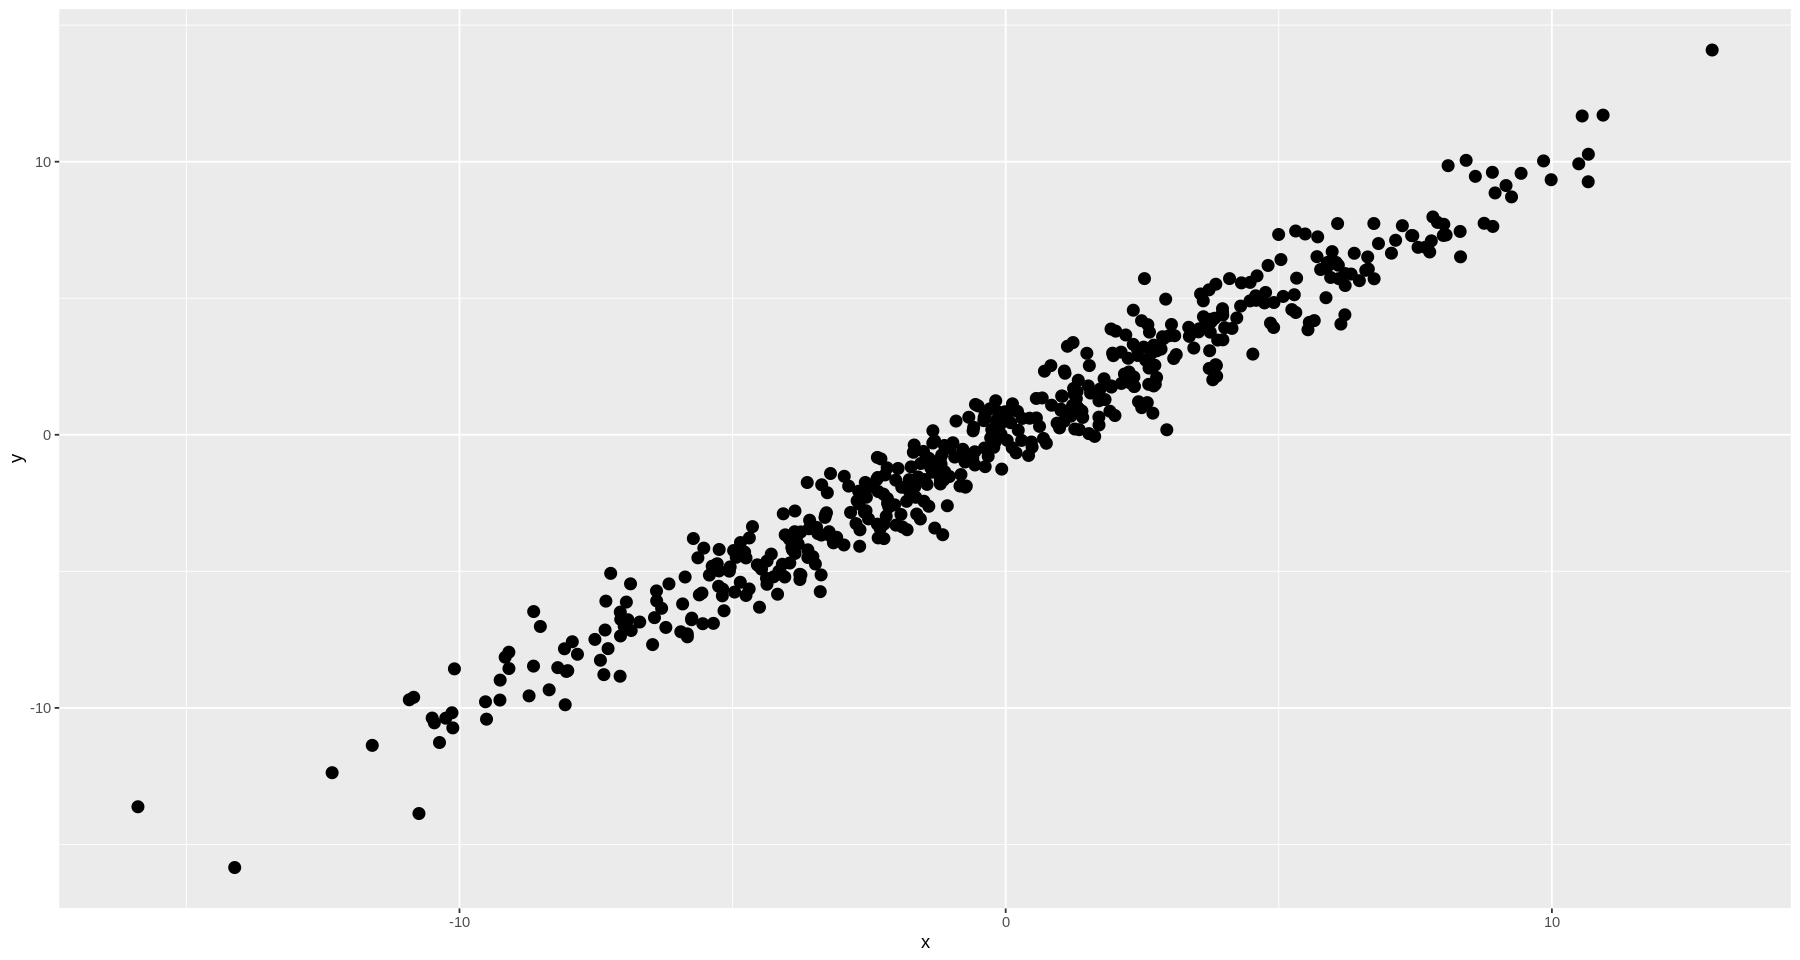

In [ ]:
options(repr.plot.width=15, repr.plot.height=8) 
set.seed(101)
x<-rnorm(500,0,5)
e<-rnorm(500,0,1)
y=x+e
df<-data.frame(x,y)
ggplot(df,aes(x,y))+
  geom_point(size=3)

#### It appears as though the data have much variation on both the X and the Y axes.

#### You may also agree that X and Y are strongly correlated.

#### In other words, if we know X, we would have already known a lot about Y as well.

#### Correlation indicates that there is **redundancy** in the data. Due to this redundancy, Principal Component Analysis (PCA) can be used to **reduce** the original variables into a smaller number of *principal components* explaining most of the variance in the original variables.

In [ ]:
# principal component analysis
df.pca<-prcomp(df,scale=TRUE)
df1<-as.data.frame(df.pca$x)
head(df1)

,PC1,PC2
,<dbl>,<dbl>
1,-0.5609384,-0.17566789
2,0.7954490,-0.10495144
3,-0.9259146,-0.03002277
4,0.3195886,-0.08600334
5,0.5370526,-0.00963378
6,1.8251950,0.01523088


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


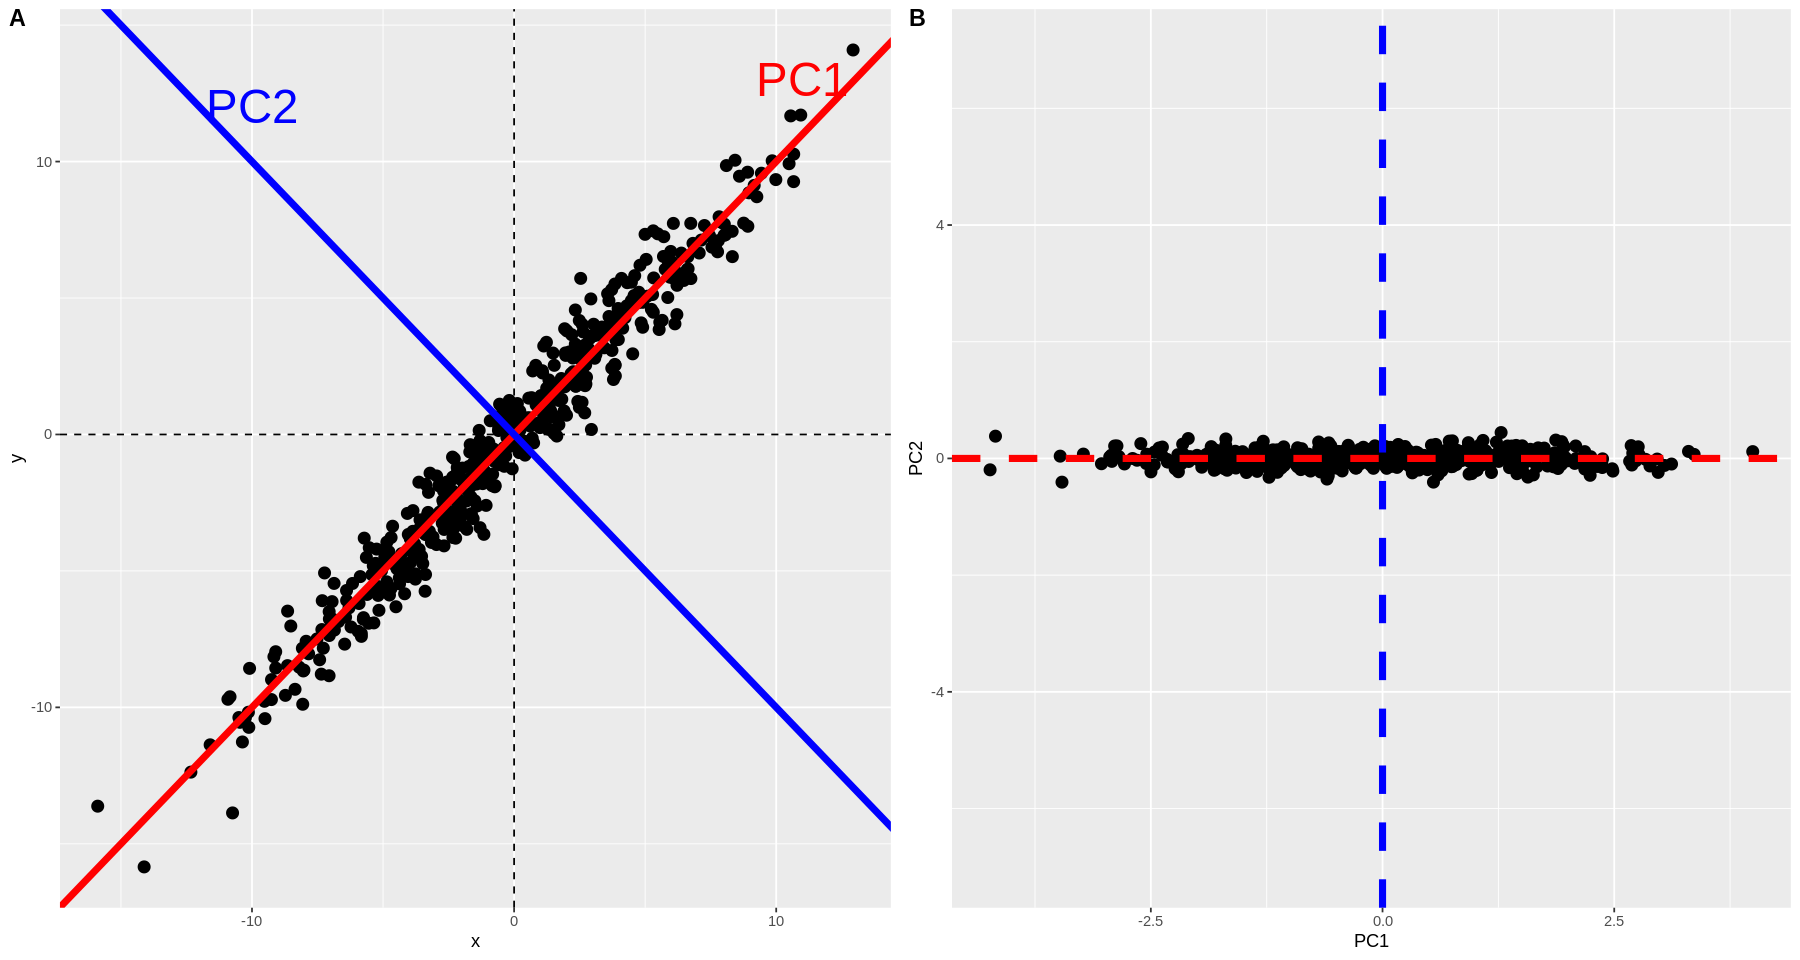

In [ ]:
plot.A<-ggplot(df,aes(x,y))+
  geom_point(size=3)+
  geom_hline(yintercept=0,linetype="dashed")+
  geom_vline(xintercept=0,linetype="dashed")+
  geom_abline(intercept=0,slope=1,color="red",size=2)+
  geom_abline(intercept=0,slope=-1,color="blue",size=2)+
  annotate("text", label = "PC1", x = 11, y = 13, size = 10, colour = "red")+
  annotate("text", label = "PC2", x = -10, y = 12, size = 10, colour = "blue")
plot.B<-ggplot(df1,aes(PC1, PC2))+
  geom_point(size=3)+
  ylim(-7,7)+
  geom_hline(yintercept=0,linetype="dashed",color="red",linewidth=2)+
  geom_vline(xintercept=0,linetype="dashed",color="blue",linewidth=2)
plot_grid(plot.A, plot.B, labels = "AUTO")


####PCA assumes that the directions with the largest variances are the most “important” (i.e, the most principal).

####In the left plot, we identify the principal directions, called principal components, in which the data varies.

####In the right plot, we rotate the data to present them along the principal directions 

####The PC1 axis is the first principal direction along which the samples show the largest variation. The PC2 axis is the second most important direction and it is orthogonal (at a right angle) to the PC1 axis.

#### Turns out that knowing a single dimension (PC1) would allow us to get the most amount of information there is in the data.

Importance of components:
                          PC1    PC2
Standard deviation     1.4076 0.1364
Proportion of Variance 0.9907 0.0093
Cumulative Proportion  0.9907 1.0000

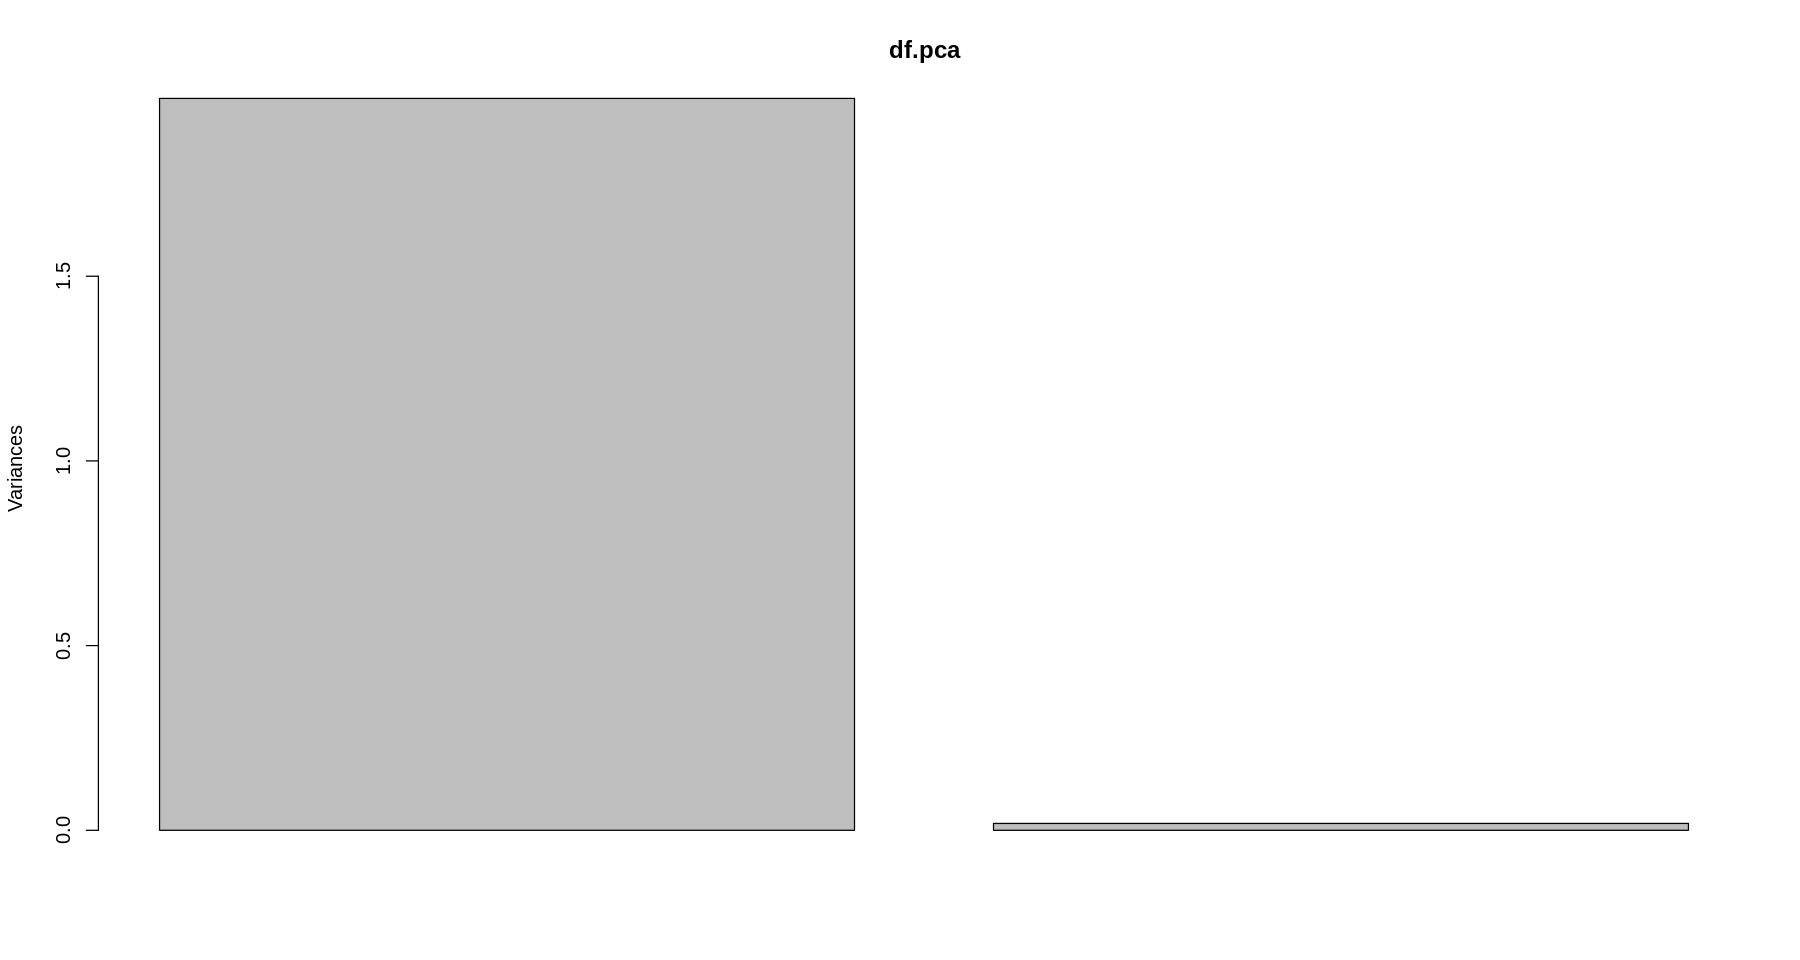

In [ ]:
summary(df.pca)
plot(df.pca)

#### The amount of variance along each principal component is measured by the so-called **eigenvalue** (need to take Linear Algebra to really know this term).

#### The above plot shows that most (in fact, 99%) of the variance of the data is along PC1, and the rest is along PC2.

### Note that if the correlations between variables are weak, it means every variable adds new information over and above the others. In that case, we can't do much to reduce the dimensions

In [ ]:
e2<-rnorm(500,0,20)
y2=x+e2
df2<-data.frame(x,y2)
df2.pca<-prcomp(df2,scale=TRUE)
df2.x<-as.data.frame(df2.pca$x)

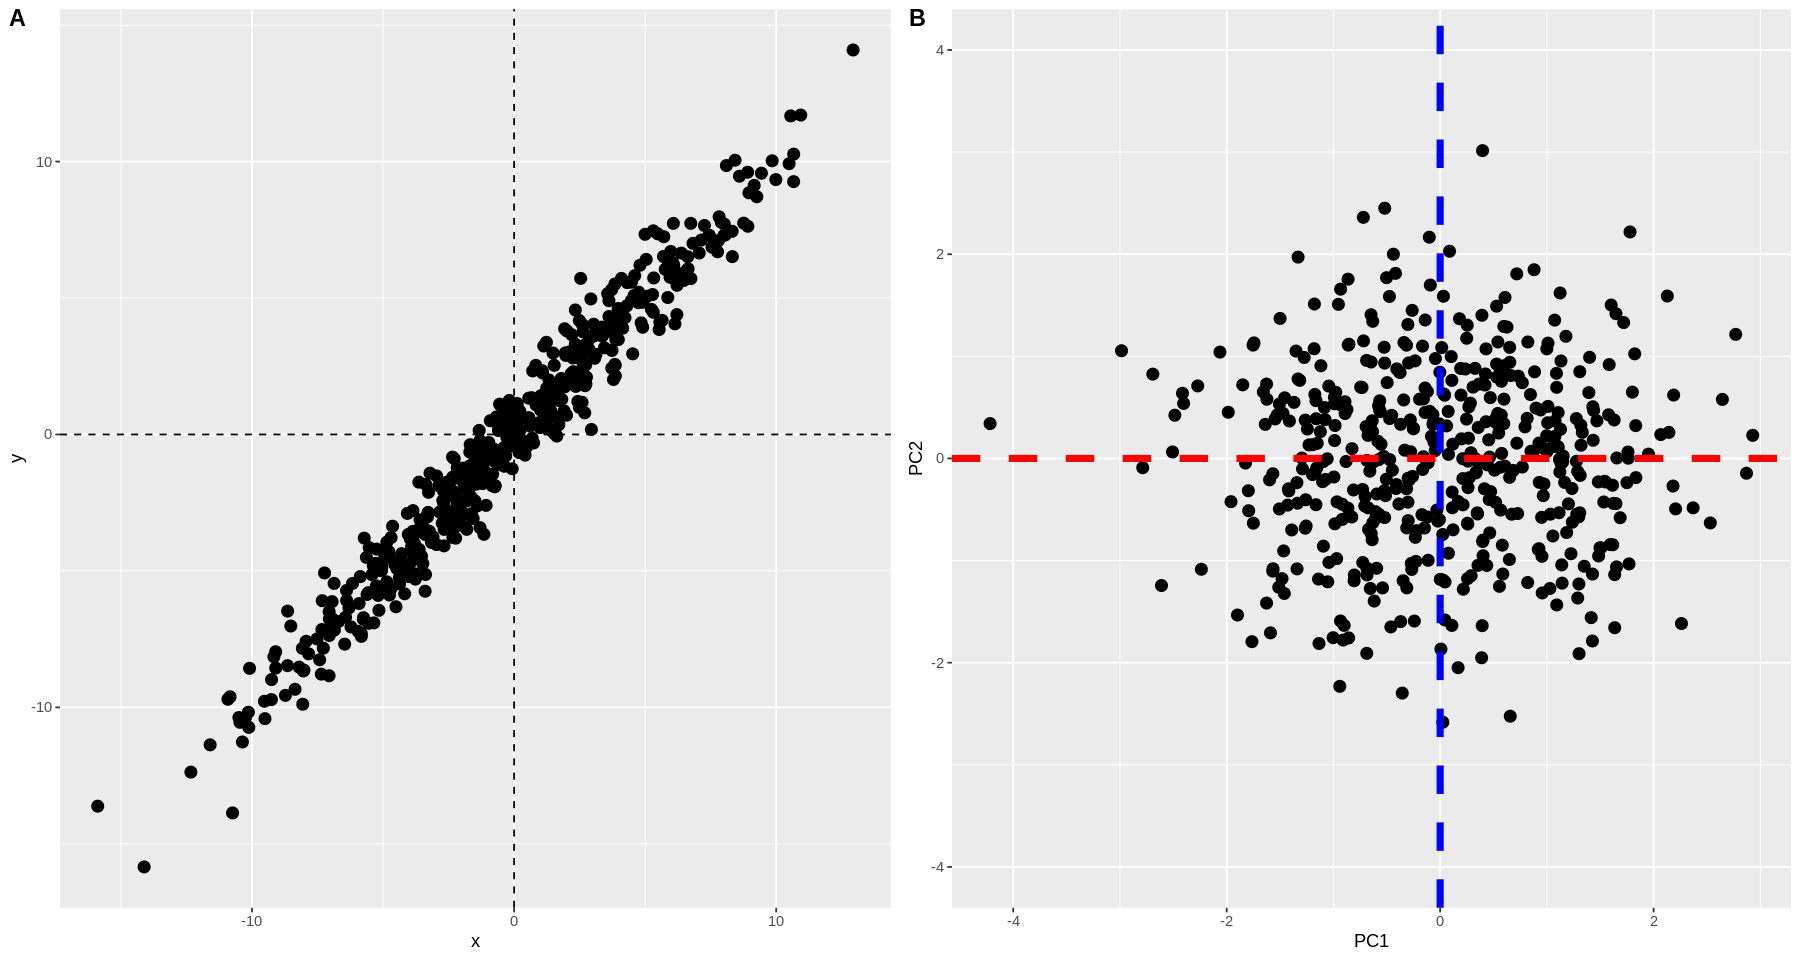

In [ ]:
plot.C<-ggplot(df1,aes(x,y))+
  geom_point(size=3)+
  geom_hline(yintercept=0,linetype="dashed")+
  geom_vline(xintercept=0,linetype="dashed")

plot.D<-ggplot(df2.x,aes(PC1, PC2))+
  geom_point(size=3)+
  ylim(-4,4)+
  geom_hline(yintercept=0,linetype="dashed",color="red",linewidth=2)+
  geom_vline(xintercept=0,linetype="dashed",color="blue",linewidth=2)
plot_grid(plot.C, plot.D, labels = "AUTO")

In [ ]:
summary(df2.pca)

Importance of components:
                          PC1    PC2
Standard deviation     1.0930 0.8974
Proportion of Variance 0.5973 0.4027
Cumulative Proportion  0.5973 1.0000

## Example1: What can we do with the decathlon data?

![picture](https://drive.google.com/uc?id=1LS5e_QXa02L1GslI9-EeYqWO4N8UZrjv)





In [ ]:
# Load Data:
system("gdown --id 1d2vu5QaW_fTowwo6smxqlUUCLc8snUk6")  
decathlon<-as_tibble(read.csv("decathlon.csv", stringsAsFactors=TRUE))

#https://drive.google.com/file/d/1d2vu5QaW_fTowwo6smxqlUUCLc8snUk6/view?usp=share_link

decathlon

Athlets,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,X1500m,Rank,Points,Competition
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.70,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.50,2,8122,Decastar
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.20,3,8099,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.10,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.40,5,8036,Decastar
WARNERS,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.10,6,8030,Decastar
ZSIVOCZKY,11.13,7.30,13.48,2.01,48.62,14.17,45.67,4.42,55.37,268.00,7,8004,Decastar
McMULLEN,10.83,7.31,13.76,2.13,49.91,14.38,44.41,4.42,56.37,285.10,8,7995,Decastar
MARTINEAU,11.64,6.81,14.57,1.95,50.14,14.93,47.60,4.92,52.33,262.10,9,7802,Decastar


### For now, let's take the ranks and the points for granted, and simply look at the athletes' performances on the ten events. How can we possibly *reduce* data in 10 dimensions to fewer dimensions?

First, let's select the 10 performance variables

In [ ]:
deca<-decathlon[,2:11]
deca

X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,X1500m
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.70
10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.50
11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.20
11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.10
11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.40
11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.10
11.13,7.30,13.48,2.01,48.62,14.17,45.67,4.42,55.37,268.00
10.83,7.31,13.76,2.13,49.91,14.38,44.41,4.42,56.37,285.10
11.64,6.81,14.57,1.95,50.14,14.93,47.60,4.92,52.33,262.10


### Check if there is missing value

In [ ]:
colSums(is.na(deca))

X100m    Long.jump     Shot.put    High.jump        X400m X110m.hurdle 
           0            0            0            0            0            0 
      Discus   Pole.vault     Javeline       X1500m 
           0            0            0            0

### check for correlation

Negative correlations are also good, as long as they are strong

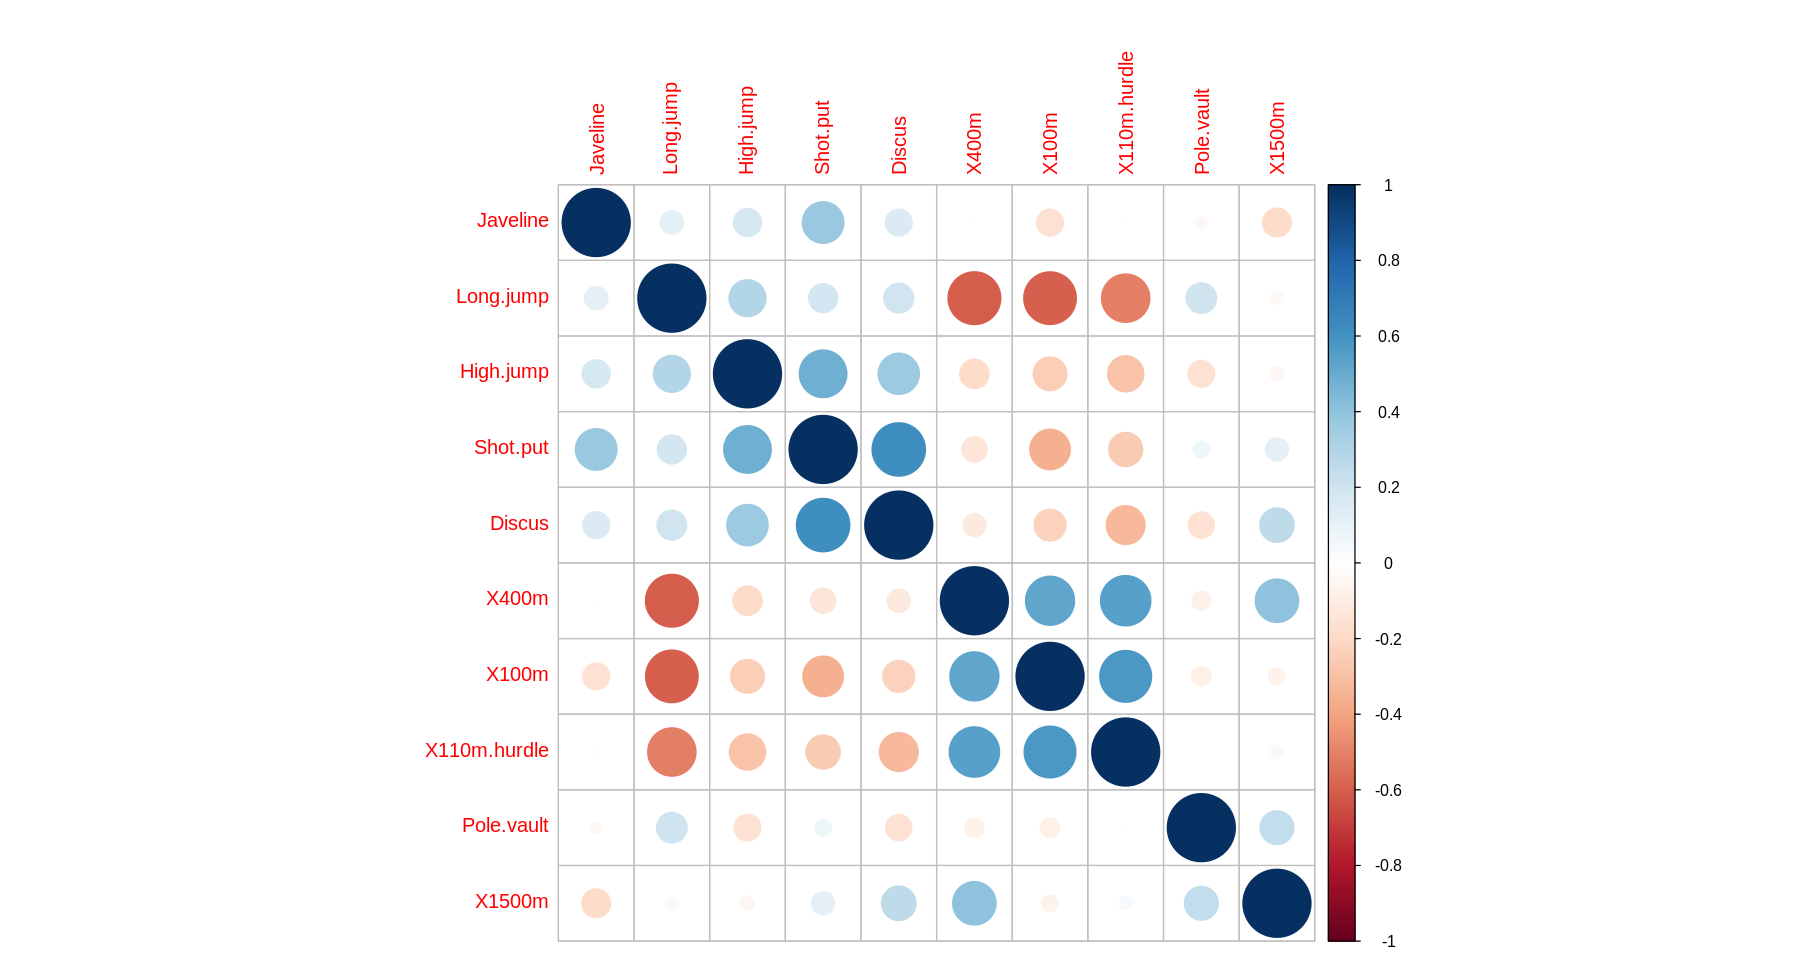

In [ ]:
corrplot(cor(deca), order = "hclust")

### Carry out PCA

After loading the data, we can use the R built-in function prcomp() to calculate the principal components of the dataset. Be sure to specify `scale = TRUE` so that each of the variables in the dataset are scaled to have a mean of 0 and a standard deviation of 1 before calculating the principal components.


In [ ]:
deca.pca<-prcomp(deca,scale=TRUE)
deca.pca

Standard deviations (1, .., p=10):
 [1] 1.8088409 1.3180027 1.1852918 1.0280323 0.8275104 0.7741245 0.6717405
 [8] 0.6299814 0.4634812 0.4268811

Rotation (n x k) = (10 x 10):
                     PC1        PC2         PC3         PC4         PC5
X100m        -0.42829627  0.1419891 -0.15557953  0.03678703 -0.36518741
Long.jump     0.41015201 -0.2620794  0.15372674 -0.09901016 -0.04432336
Shot.put      0.34414444  0.4539470 -0.01972378 -0.18539458 -0.13431954
High.jump     0.31619436  0.2657761 -0.21894349  0.13189684 -0.67121760
X400m        -0.37571570  0.4320460  0.11091758 -0.02850297  0.10597034
X110m.hurdle -0.41255442  0.1735910 -0.07815576 -0.28290068 -0.19857266
Discus        0.30542571  0.4600244  0.03623770  0.25259074  0.12667770
Pole.vault    0.02783081 -0.1368411  0.58361717 -0.53649480 -0.39873734
Javeline      0.15319802  0.2405071 -0.32874217 -0.69285498  0.36873120
X1500m       -0.03210733  0.3598049  0.65987362  0.15669648  0.18557094
                     PC6        

### Visualize the percentages of variance explained by each principal component (Screeplot)

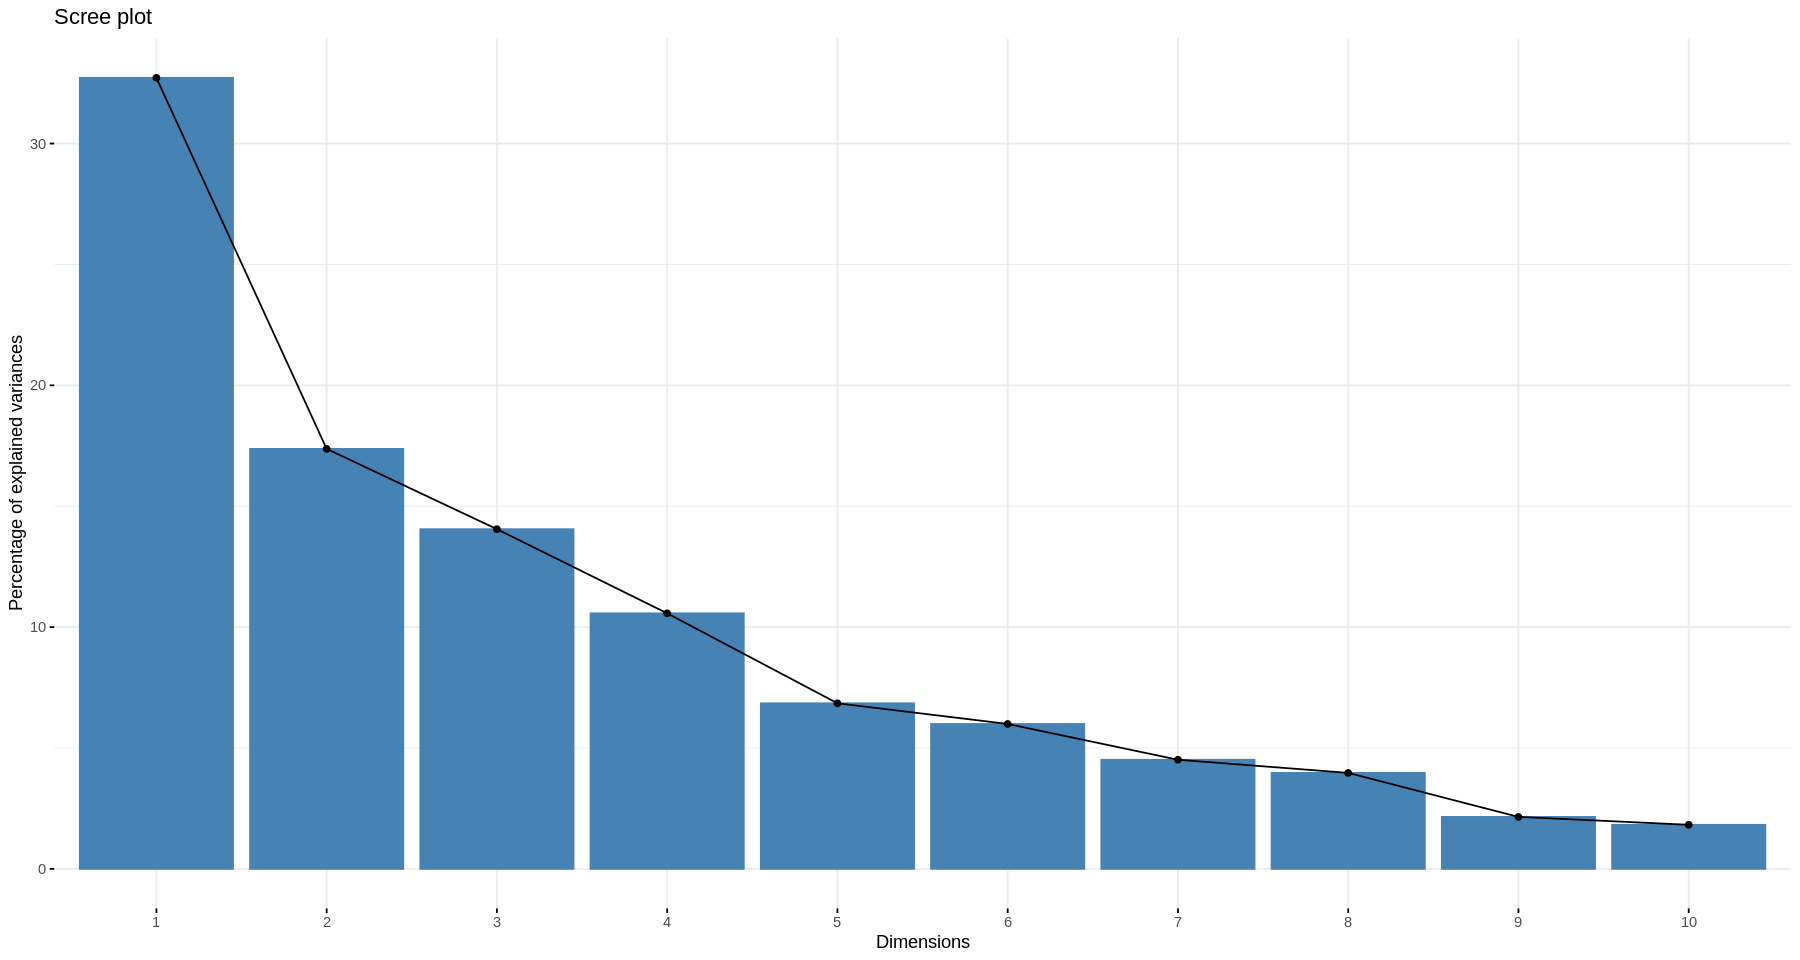

In [ ]:
fviz_eig(deca.pca)

### Identify and Interpret the Dimensions/PCs

#### How the variables align with the top 2 principal components. 

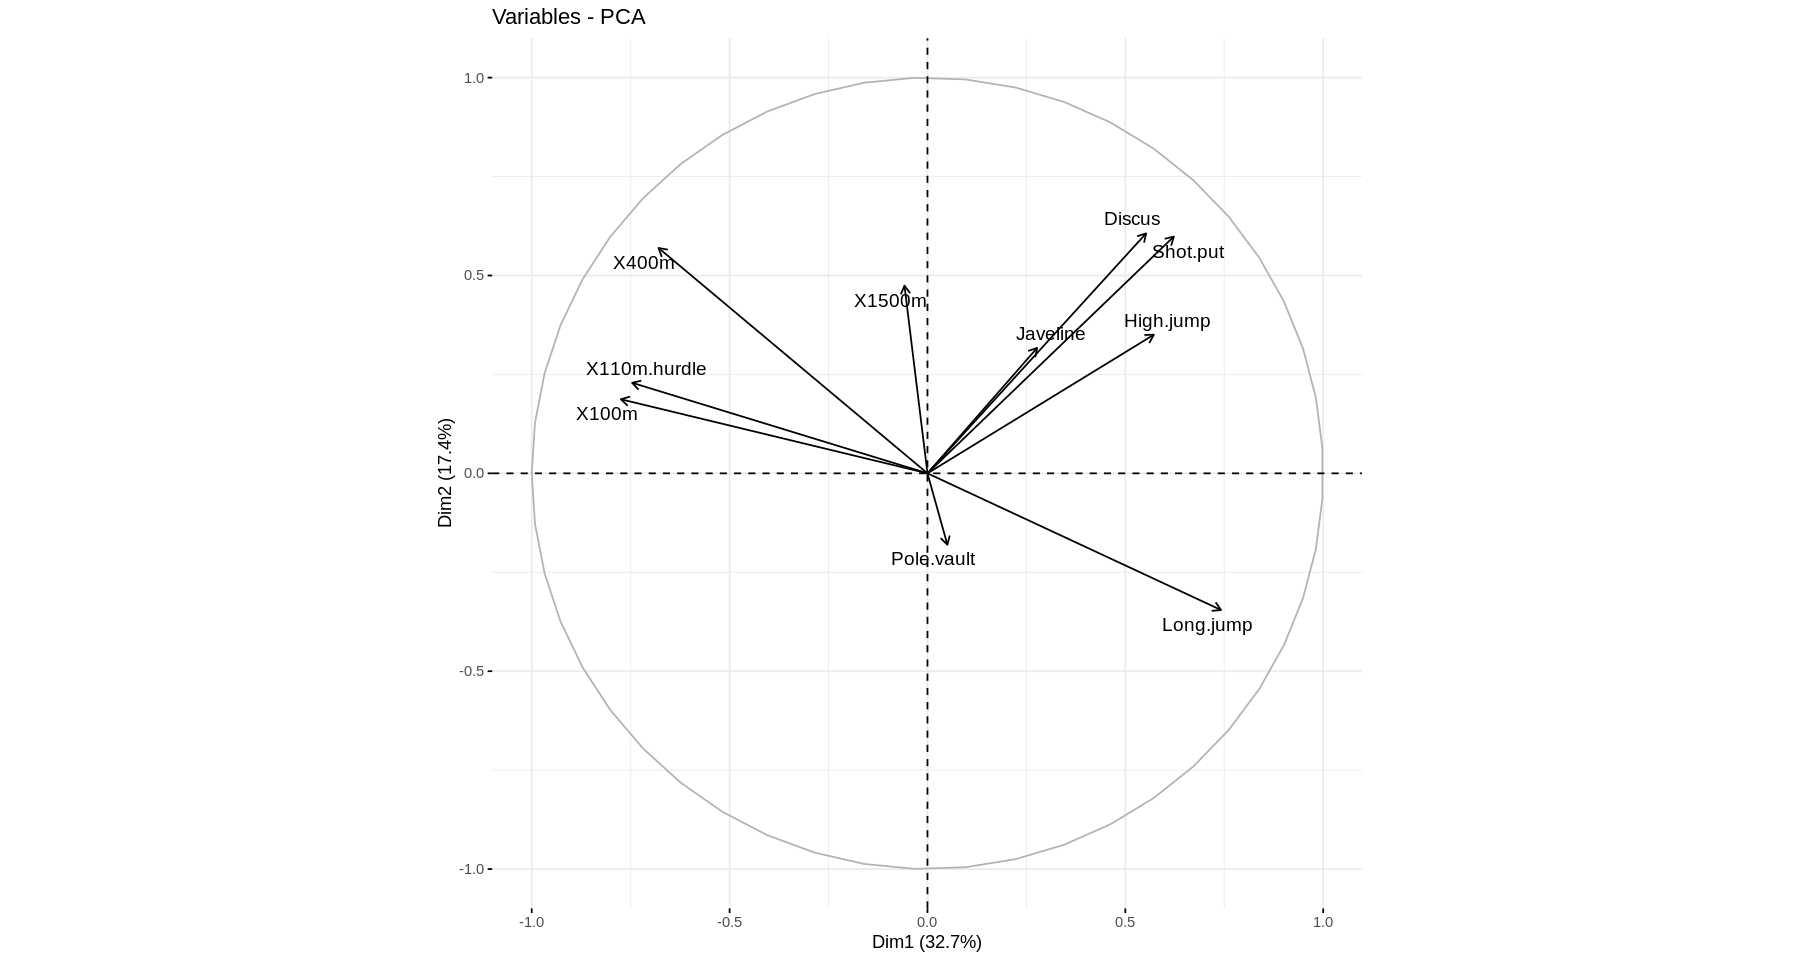

In [ ]:
fviz_pca_var(deca.pca,repel=TRUE)

The plot above is also known as variable correlation plots. It shows the relationships between all variables. It can be interpreted as follow:

* Positively correlated variables are grouped together.
* Negatively correlated variables are positioned on opposite sides of the plot origin (opposed quadrants).
* The distance between variables and the origin measures the quality of representation of the variables on the factor map. Variables that are away from the origin are well represented on the factor map.



### Which variables are well represented in each dimension?

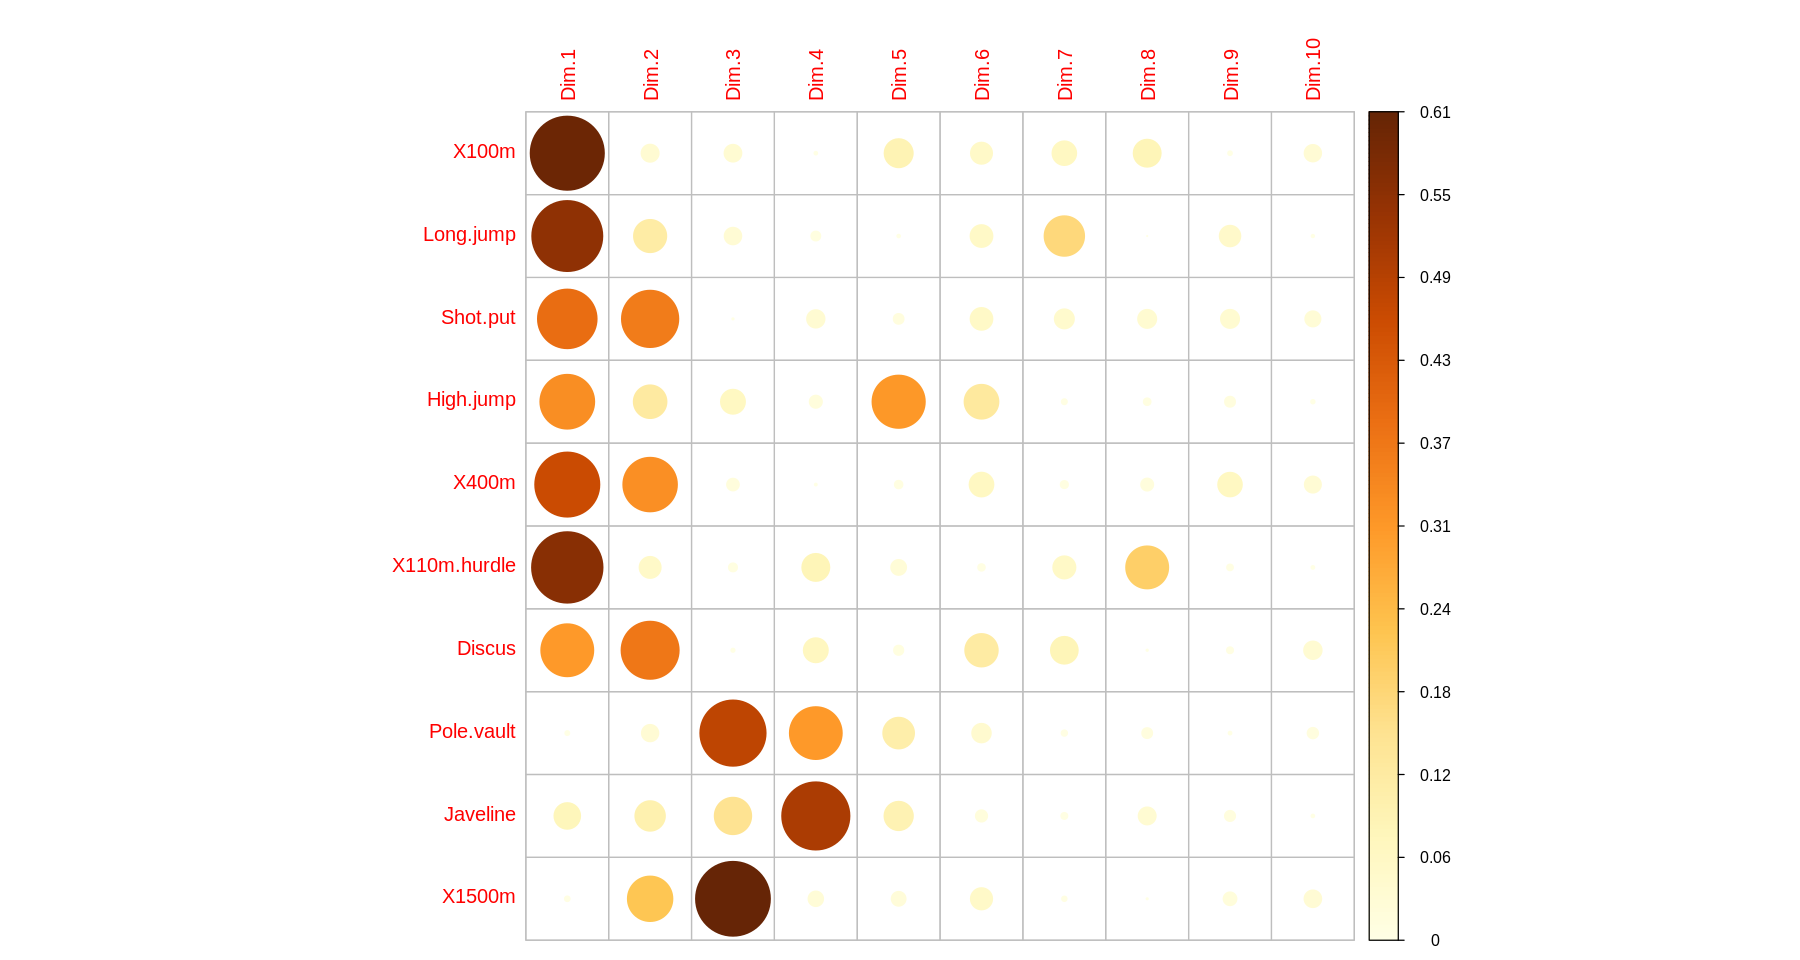

In [ ]:
deca.var <- get_pca_var(deca.pca)
corrplot(deca.var$cos2, is.corr=FALSE)

* The cos2 values are used to estimate the quality of the representation
* Variables that have higher quality of representation on a PC are more important  to the interpretation of these components.

### Take a closer look at each dimension

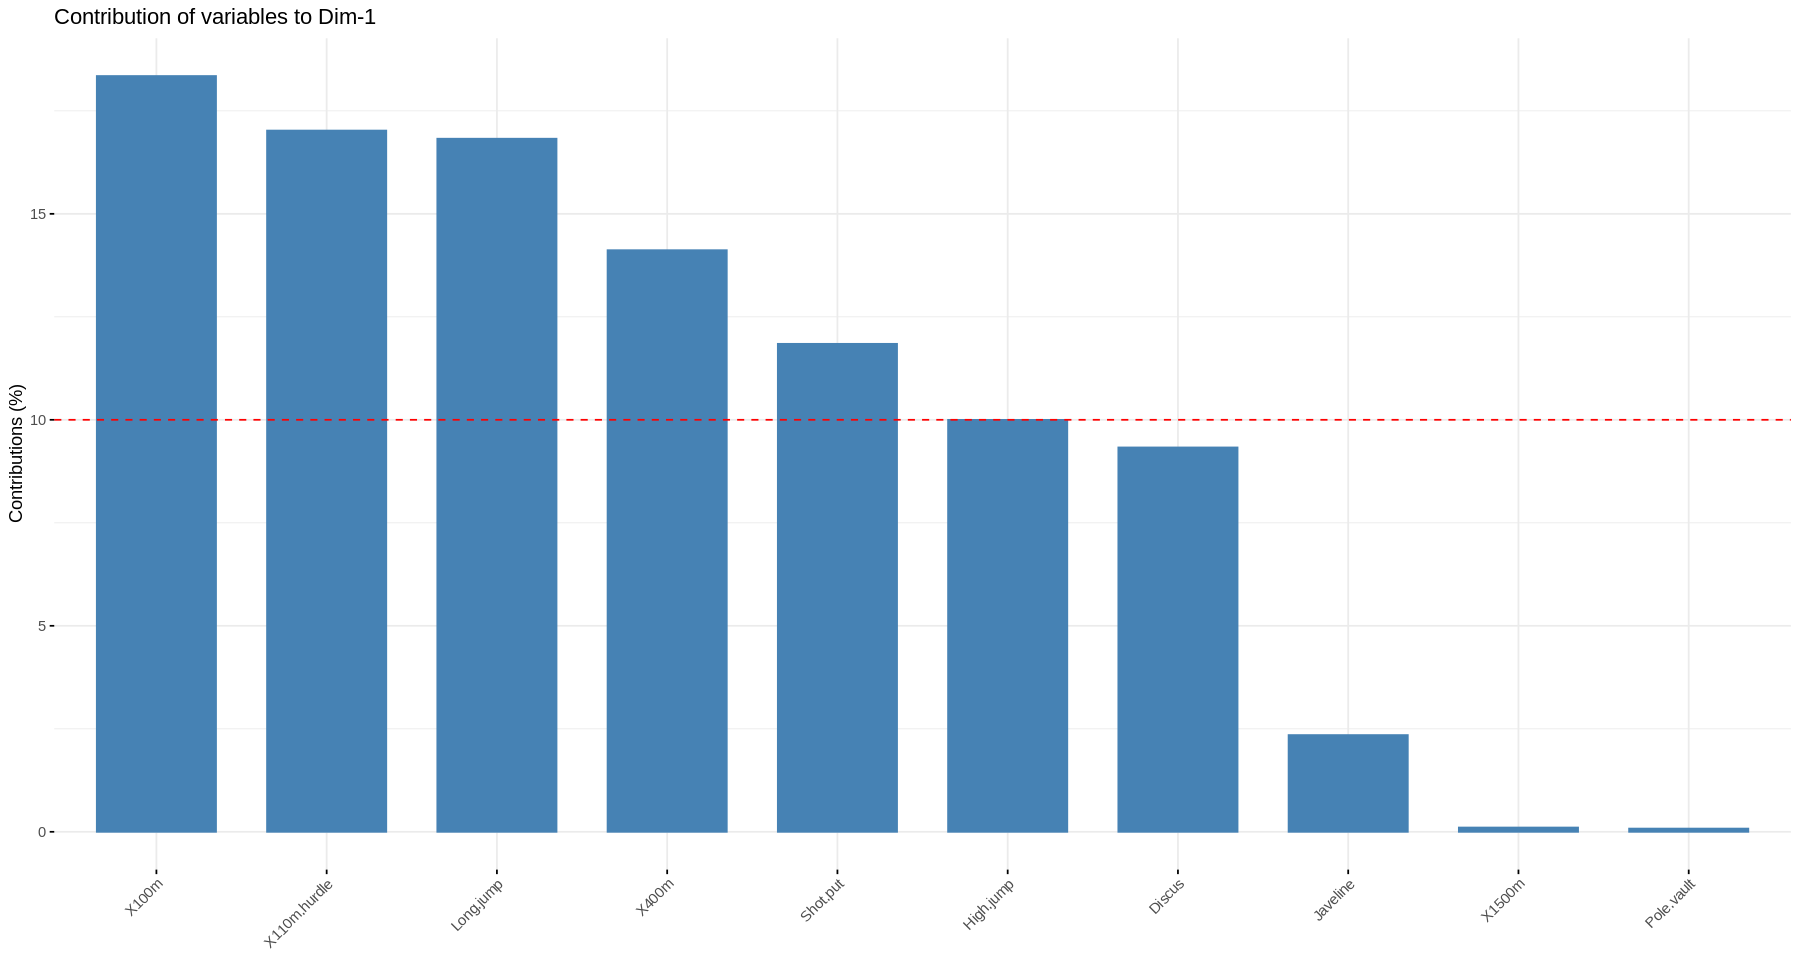

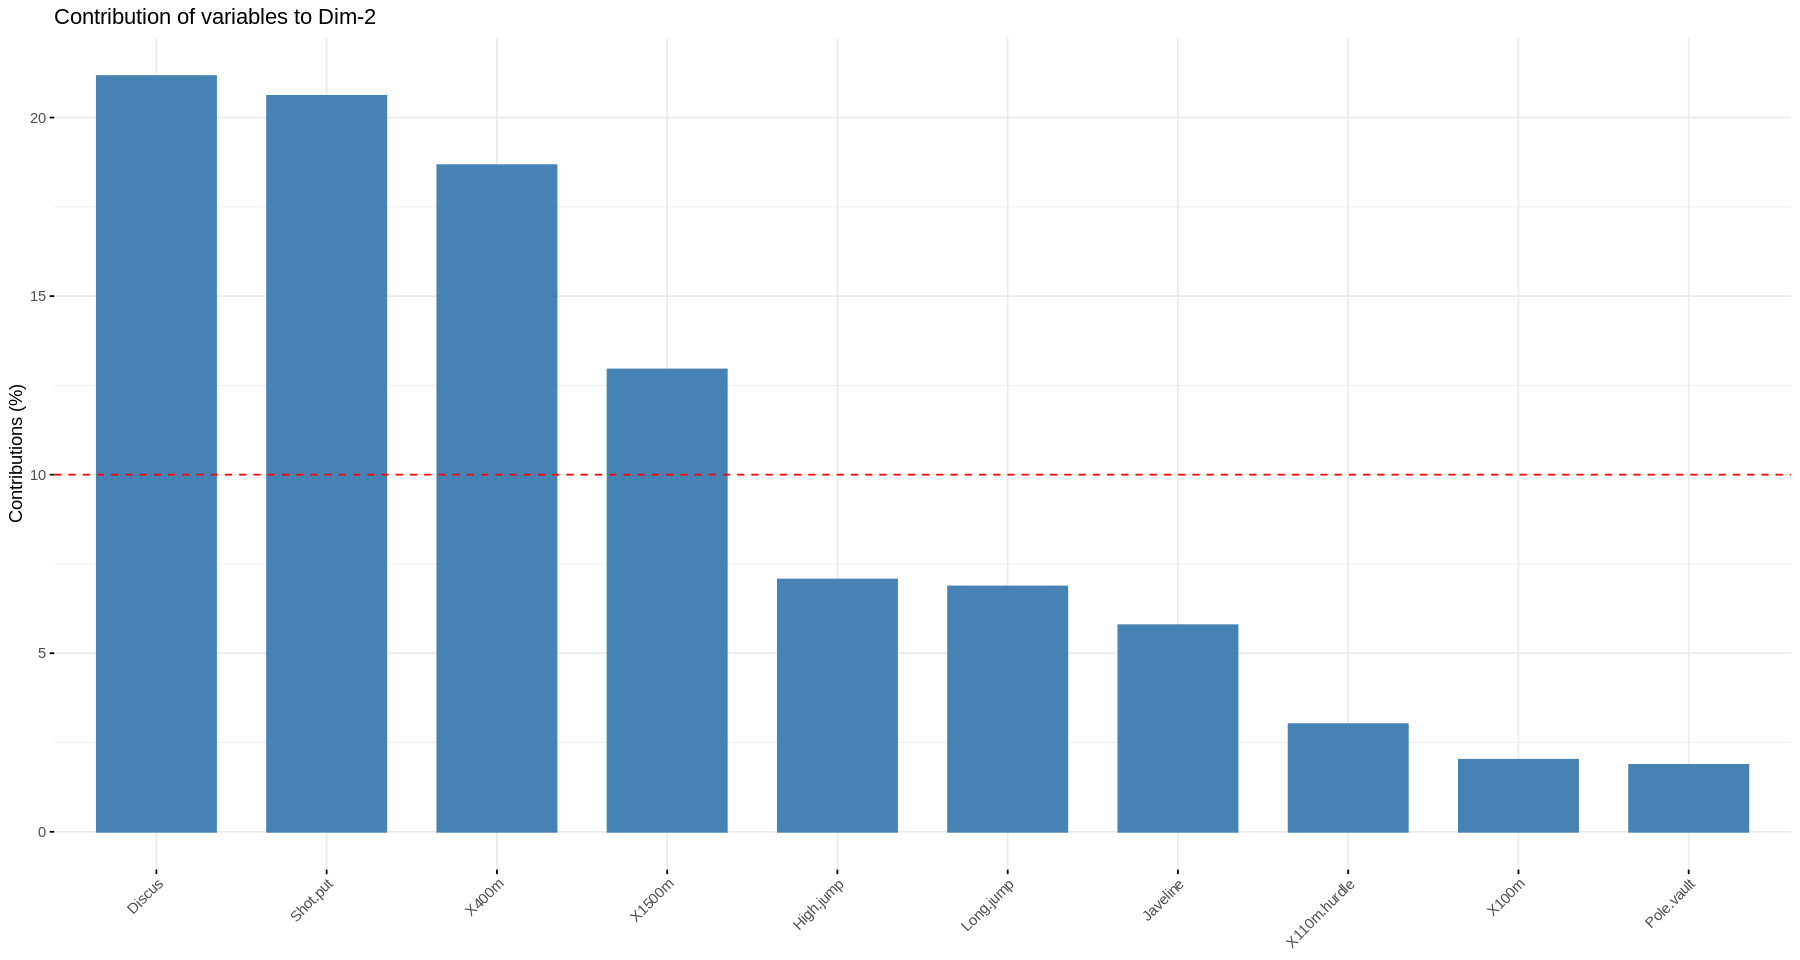

In [ ]:
# Contributions of variables to PC1
fviz_contrib(deca.pca, choice = "var", axes = 1, top = 10)
# Contributions of variables to PC2
fviz_contrib(deca.pca, choice = "var", axes = 2, top = 10)

### Results for Individuals

In [ ]:
deca.pca$x

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0.78191413,0.76214321,0.8166955191,-1.16021421,-0.69848190,-1.01797412,-0.54475545,0.43030983,-0.135870970,-0.494629080
1.21983673,0.56752776,2.1149730024,0.35049074,1.95034259,0.68165754,-0.69928695,0.59601485,-0.641277634,0.262853864
1.34154909,0.47808177,1.9322539123,1.83374381,-0.78545712,0.72376007,-0.18760857,0.24722569,-0.790829224,-0.516848110
-0.60203609,-0.86389648,0.8790207310,-2.19336464,-0.35719877,0.27221649,0.04900196,-0.06663034,-0.714406067,-0.186146819
-0.57877827,2.10480655,-1.2101236287,-0.86285998,-1.23601438,-0.10332213,-0.56688318,-0.09344278,-0.199735141,-0.055749942
0.35251035,-1.66428157,0.7571472286,0.58207366,-0.98937076,0.03195910,-0.09540515,0.29675878,0.600011252,-0.712434330
0.26843999,-1.08035451,-1.2670273099,1.60166732,-0.04353248,0.18309575,-0.53634049,0.73008762,-0.350064140,0.144266961
0.58030713,0.22789876,-0.4125084572,1.50552979,-0.24843341,-1.74619034,0.10366547,0.25432576,-0.531512133,0.325603823
-1.97087543,0.55411233,-0.7209898619,0.53553837,-1.55884817,2.33289603,-0.32830478,0.44262323,0.394211348,0.577312730
-1.52710548,0.48239035,0.8304690704,-0.32713081,0.23209699,0.21976790,-1.54715855,0.06649110,1.306669620,-0.222201495


### How much does the points gained in a Decathlon game align with the first principal component?

In [ ]:
# combine the PCA results with the original data frame
decathlon<-cbind(decathlon,deca.pca$x)
names(decathlon)

[1] "Athlets"      "X100m"        "Long.jump"    "Shot.put"     "High.jump"   
 [6] "X400m"        "X110m.hurdle" "Discus"       "Pole.vault"   "Javeline"    
[11] "X1500m"       "Rank"         "Points"       "Competition"  "PC1"         
[16] "PC2"          "PC3"          "PC4"          "PC5"          "PC6"         
[21] "PC7"          "PC8"          "PC9"          "PC10"

`geom_smooth()` using formula = 'y ~ x'


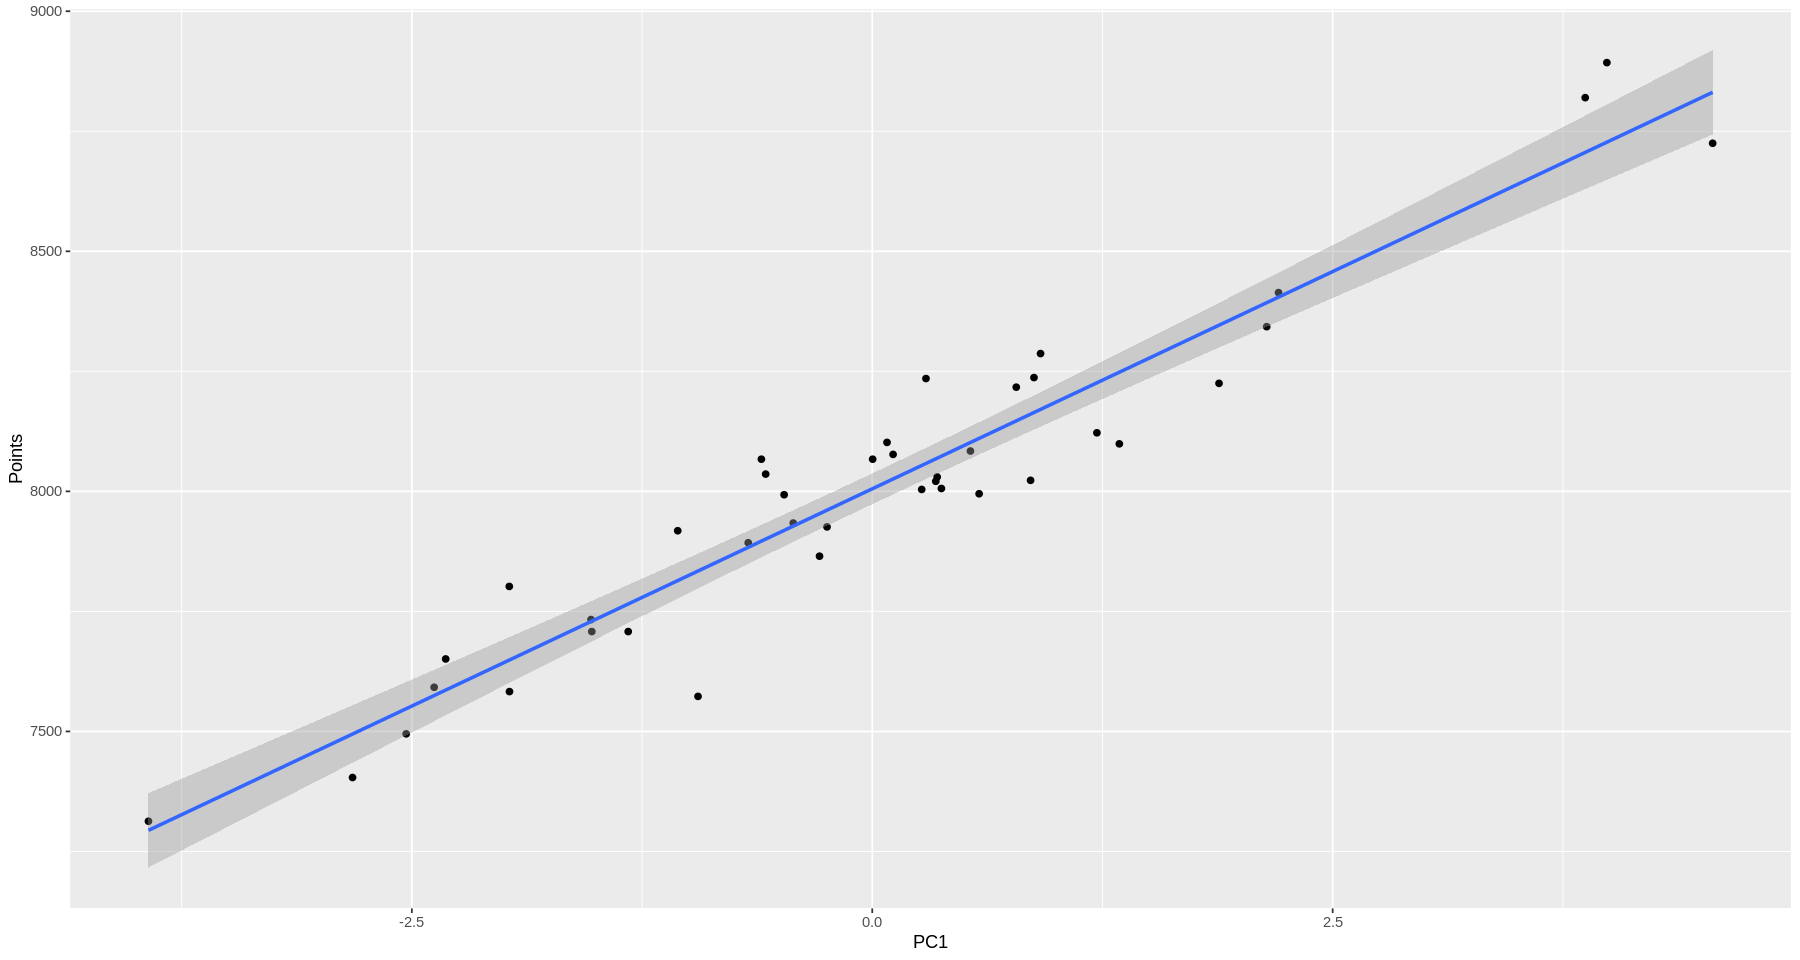

In [ ]:
ggplot(decathlon,aes(PC1,Points))+geom_point()+geom_smooth(method="lm")

##Example 2: USArrests

This data set is built into r, and contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973.

Get summary and check for null values

In [ ]:
summary(USArrests)
colSums(is.na(USArrests))

     Murder          Assault         UrbanPop          Rape      
 Min.   : 0.800   Min.   : 45.0   Min.   :32.00   Min.   : 7.30  
 1st Qu.: 4.075   1st Qu.:109.0   1st Qu.:54.50   1st Qu.:15.07  
 Median : 7.250   Median :159.0   Median :66.00   Median :20.10  
 Mean   : 7.788   Mean   :170.8   Mean   :65.54   Mean   :21.23  
 3rd Qu.:11.250   3rd Qu.:249.0   3rd Qu.:77.75   3rd Qu.:26.18  
 Max.   :17.400   Max.   :337.0   Max.   :91.00   Max.   :46.00  

Murder  Assault UrbanPop     Rape 
       0        0        0        0

#### Find out about missing data

#### Check Correlations

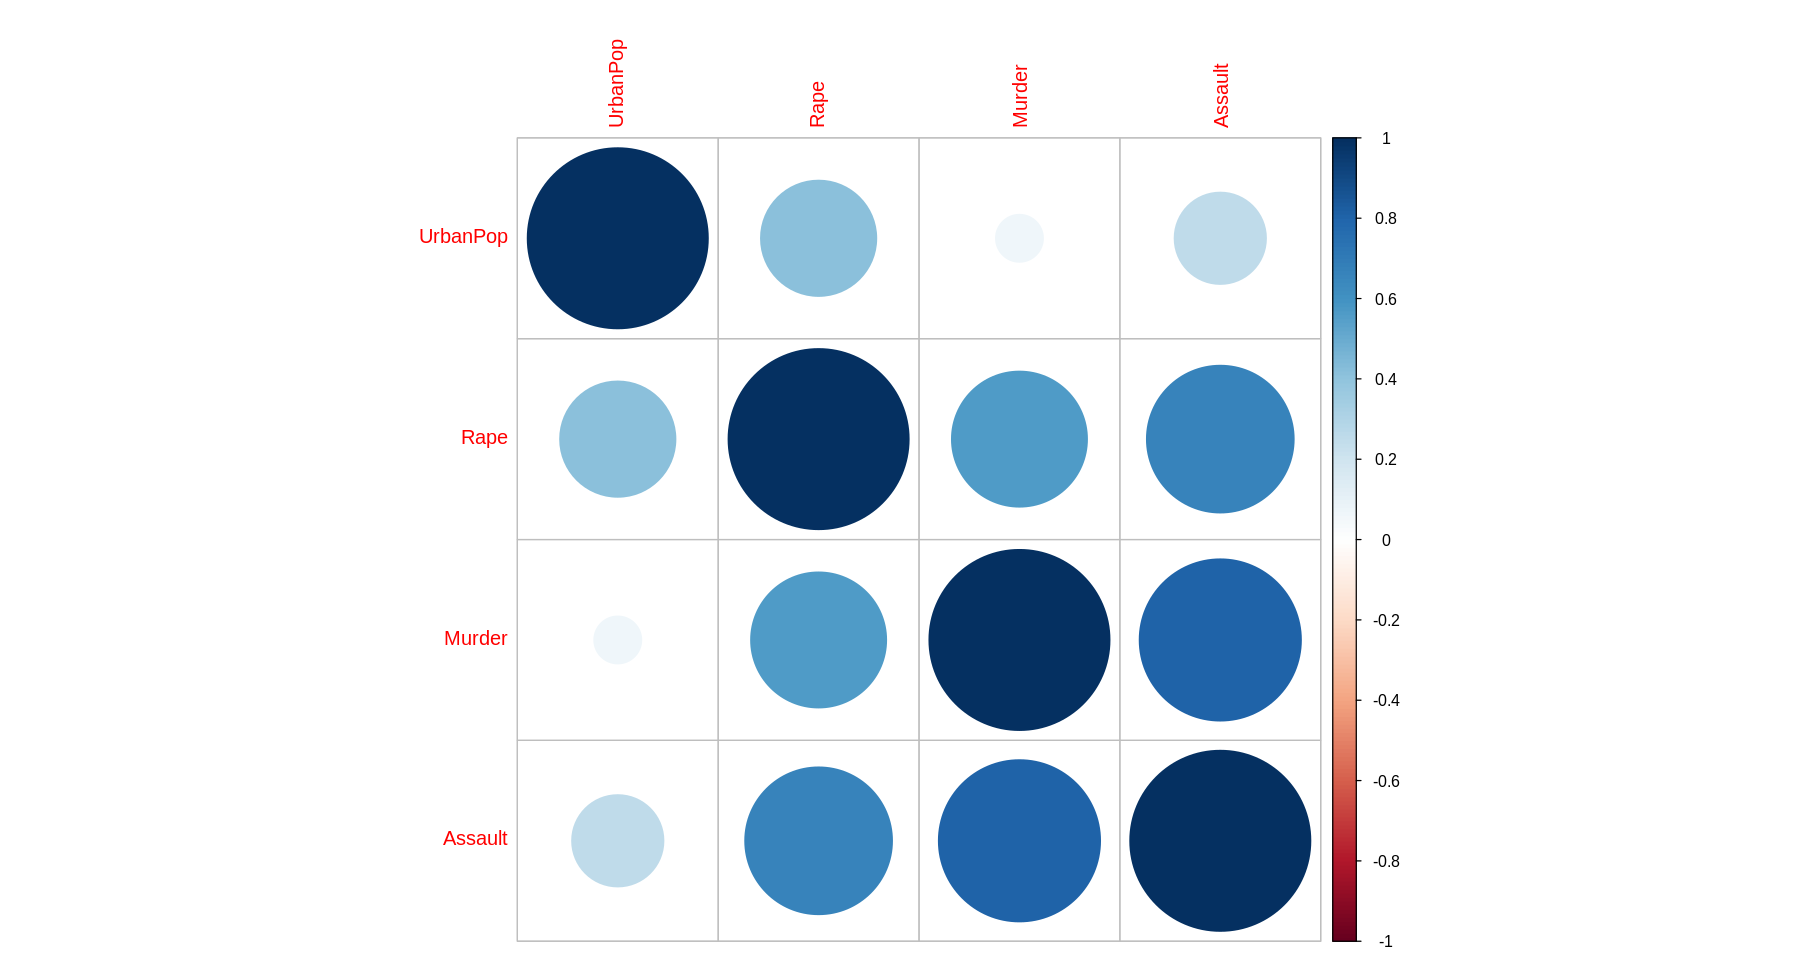

In [ ]:
corrplot(cor(USArrests), order = "hclust")

#### Calculate the Principal Components


In [ ]:
USArrests.pca<-prcomp(USArrests,scale=TRUE)
USArrests.pca

Standard deviations (1, .., p=4):
[1] 1.5748783 0.9948694 0.5971291 0.4164494

Rotation (n x k) = (4 x 4):
                PC1        PC2        PC3         PC4
Murder   -0.5358995  0.4181809 -0.3412327  0.64922780
Assault  -0.5831836  0.1879856 -0.2681484 -0.74340748
UrbanPop -0.2781909 -0.8728062 -0.3780158  0.13387773
Rape     -0.5434321 -0.1673186  0.8177779  0.08902432

#### Create Screeplot

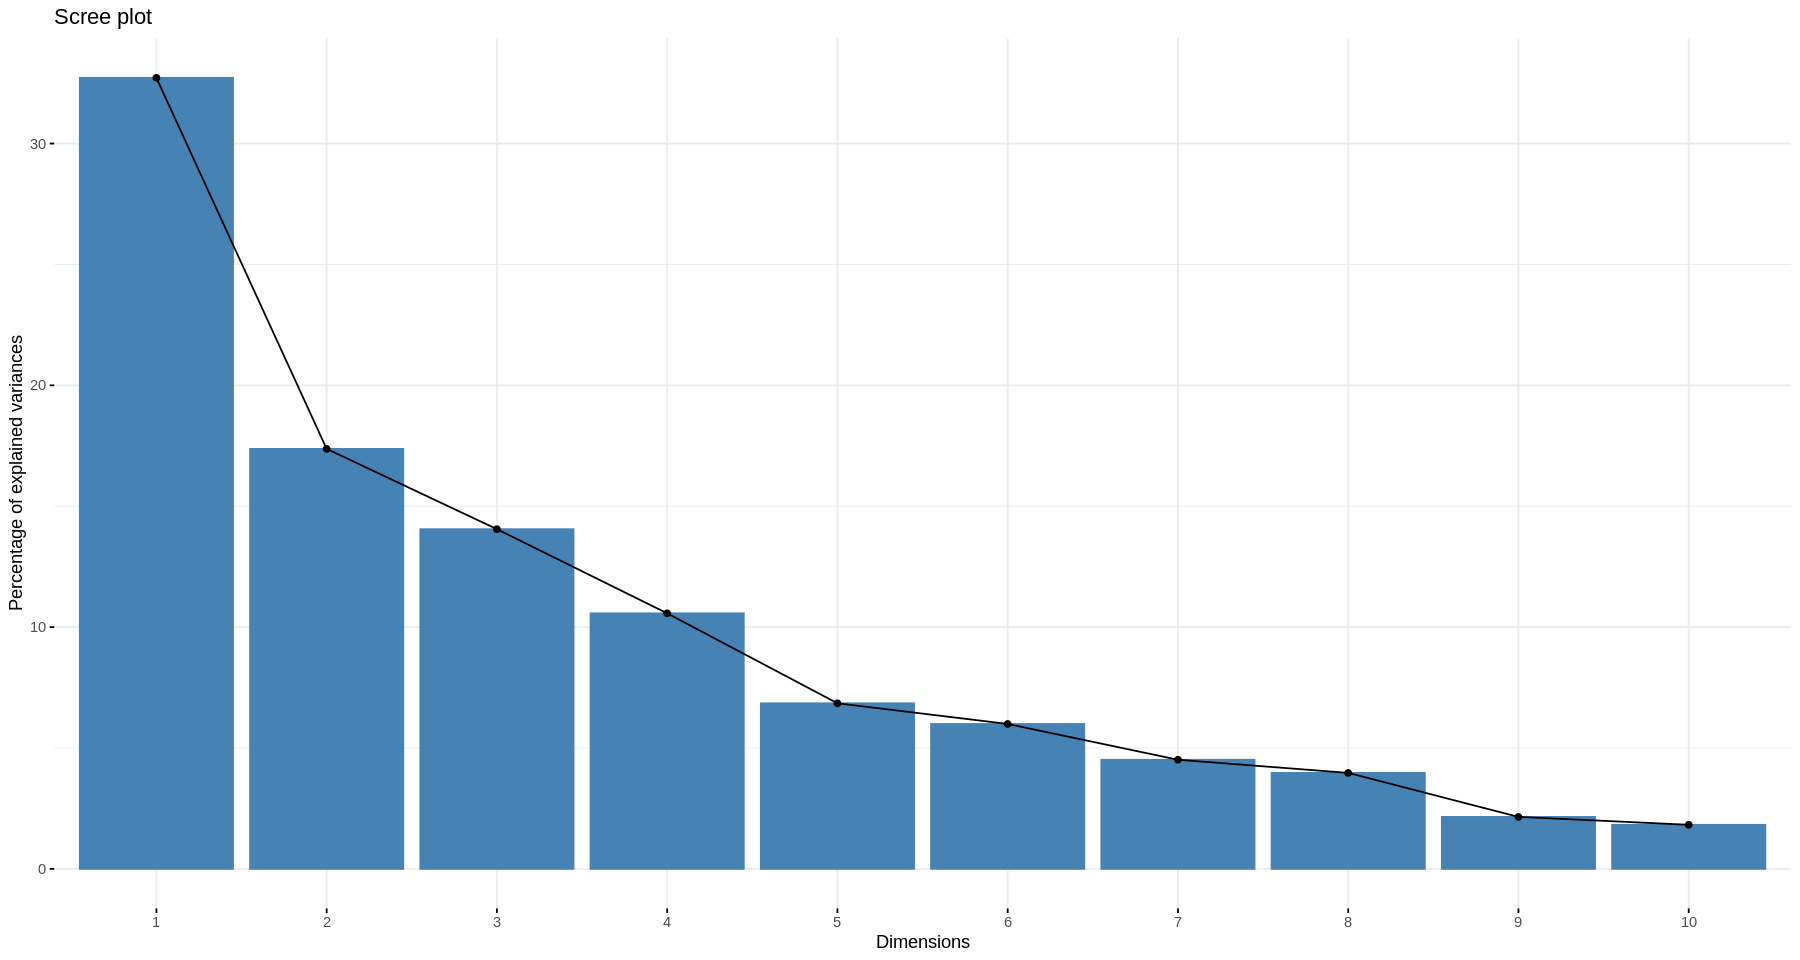

In [ ]:
fviz_eig(deca.pca)

#### Create Variable Correlation Plot

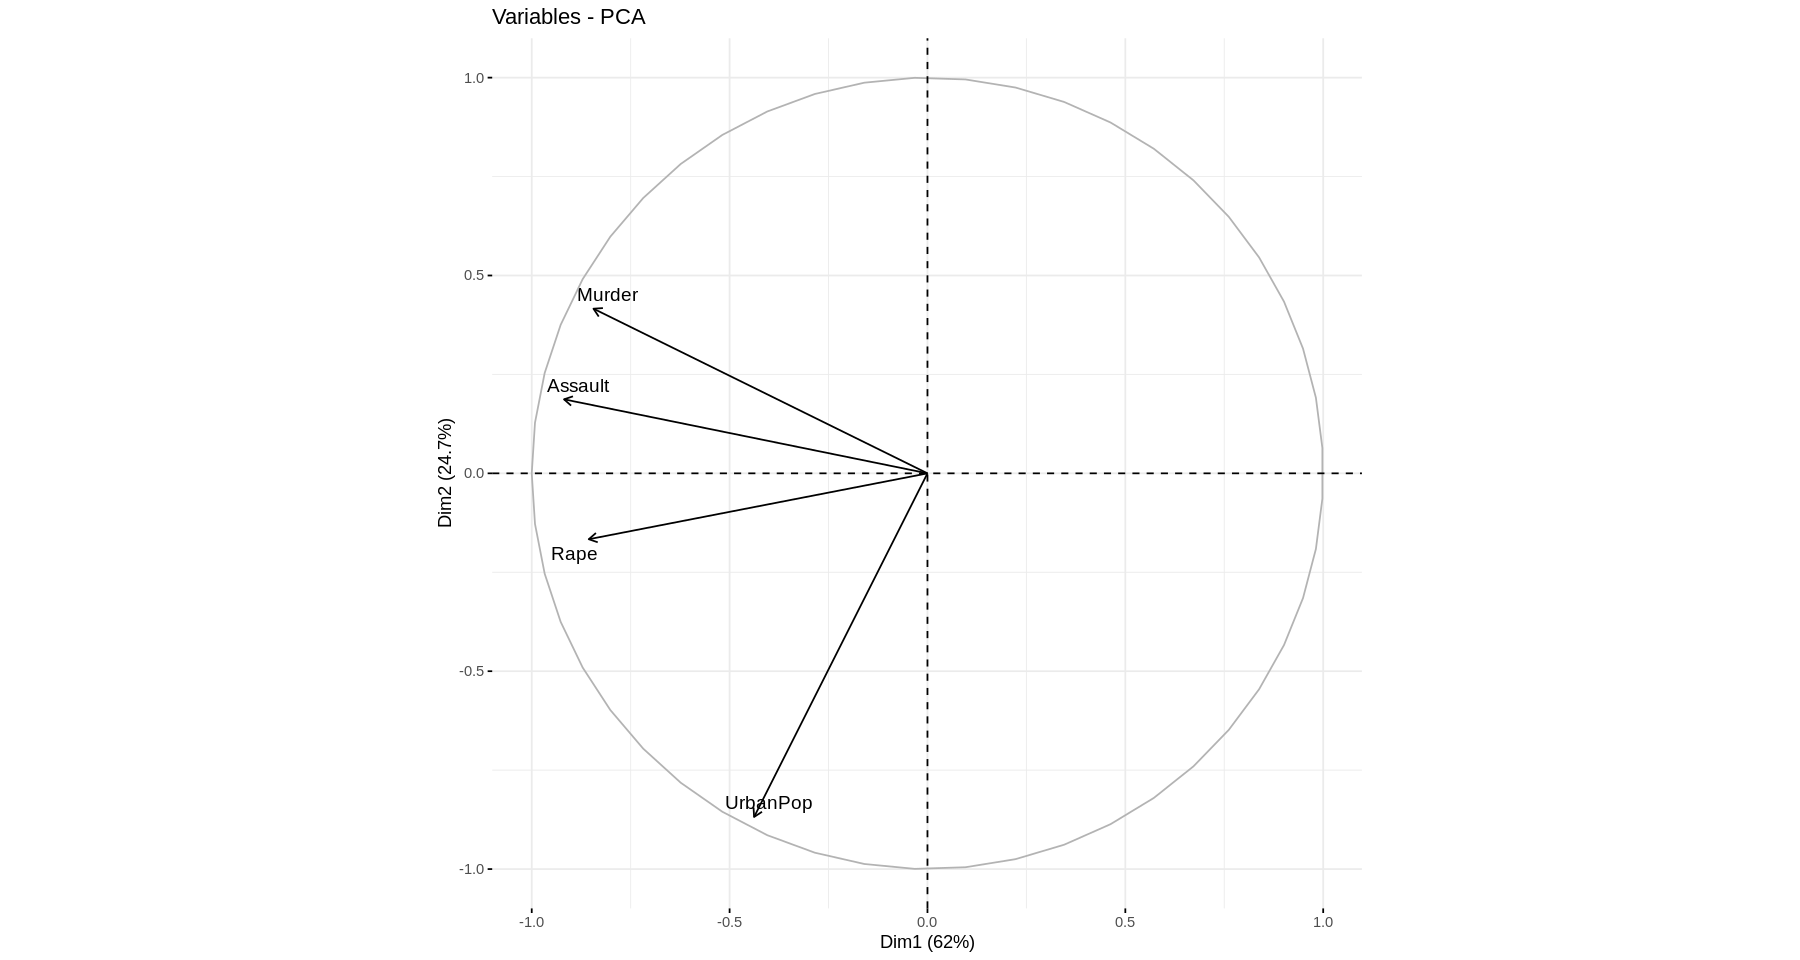

In [ ]:
fviz_pca_var(USArrests.pca,repel=TRUE)


### Quality of Representation Plot

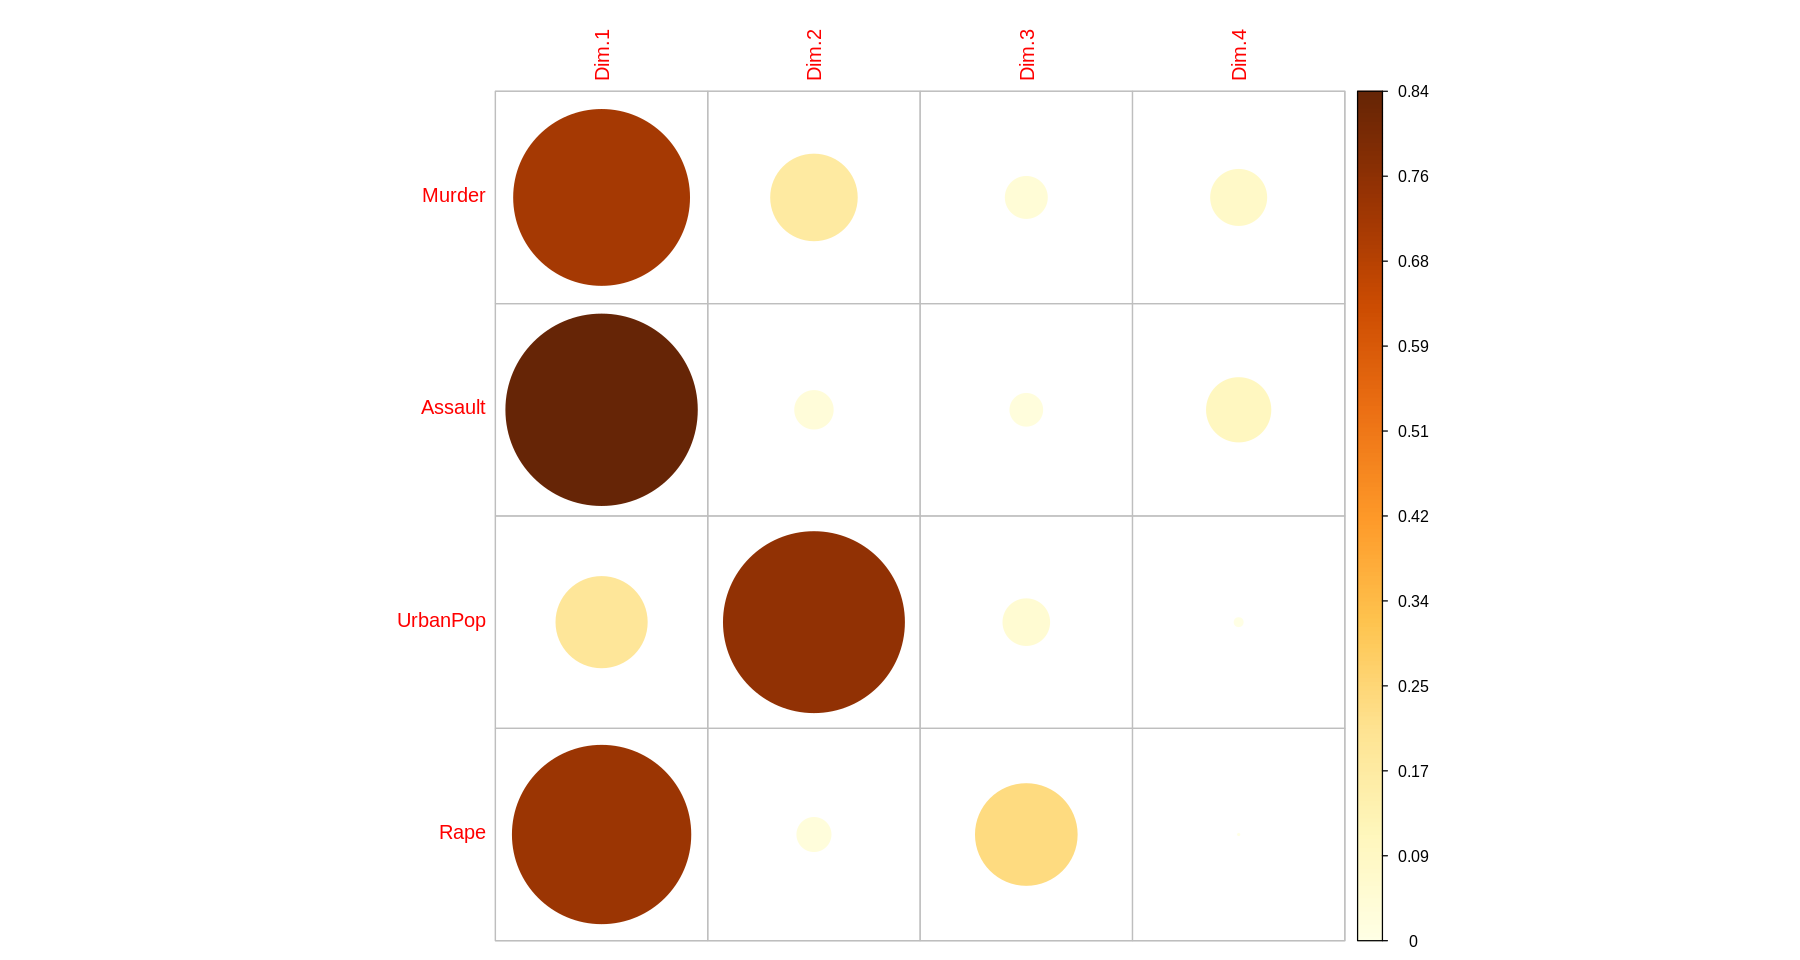

In [ ]:
USArrests.var <- get_pca_var(USArrests.pca)
corrplot(USArrests.var$cos2, is.corr=FALSE)

### Get Principal Component Scores

Note in the variable correlation plot that eigenvectors in R point in the negative direction by default (I guess it's a bug), so we’ll multiply by -1 to reverse the signs.



In [ ]:
USArrests1<-cbind(USArrests, USArrests.pca$x) #binds the pca data to the

###Plot PC2 against PC1, label by states

In [ ]:
USArrests %>%
  ggplot(aes(PC1, PC2))